In [ ]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from sklearn import linear_model
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
import xgboost 




In [ ]:
# Importing the dataset
data = pd.read_csv('Weather.csv - Dataset.csv')

In [ ]:
# Analyze the data
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,@dropdown
0,2008-12-01,Delhi,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,NaN
1,2008-12-02,Delhi,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,NaN
2,2008-12-03,Delhi,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,NaN
3,2008-12-04,Delhi,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,NaN
4,2008-12-05,Delhi,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,NaN


In [6]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,@dropdown
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,0.0
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,NaN
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,NaN
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,NaN
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,NaN
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,NaN
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,NaN
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
data.shape

(145460, 24)

In [ ]:
# Handling the missing values
data.isnull().sum()

Date                  0
Location              0
MinTemp            1485
MaxTemp            1261
Rainfall           3261
Evaporation       62790
Sunshine          69835
WindGustDir       10326
WindGustSpeed     10263
WindDir9am        10566
WindDir3pm         4228
WindSpeed9am       1767
WindSpeed3pm       3062
Humidity9am        2654
Humidity3pm        4507
Pressure9am       15065
Pressure3pm       15028
Cloud9am          55888
Cloud3pm          59358
Temp9am            1767
Temp3pm            3609
RainToday          3261
RainTomorrow       3253
@dropdown        145460
dtype: int64

<Axes: >

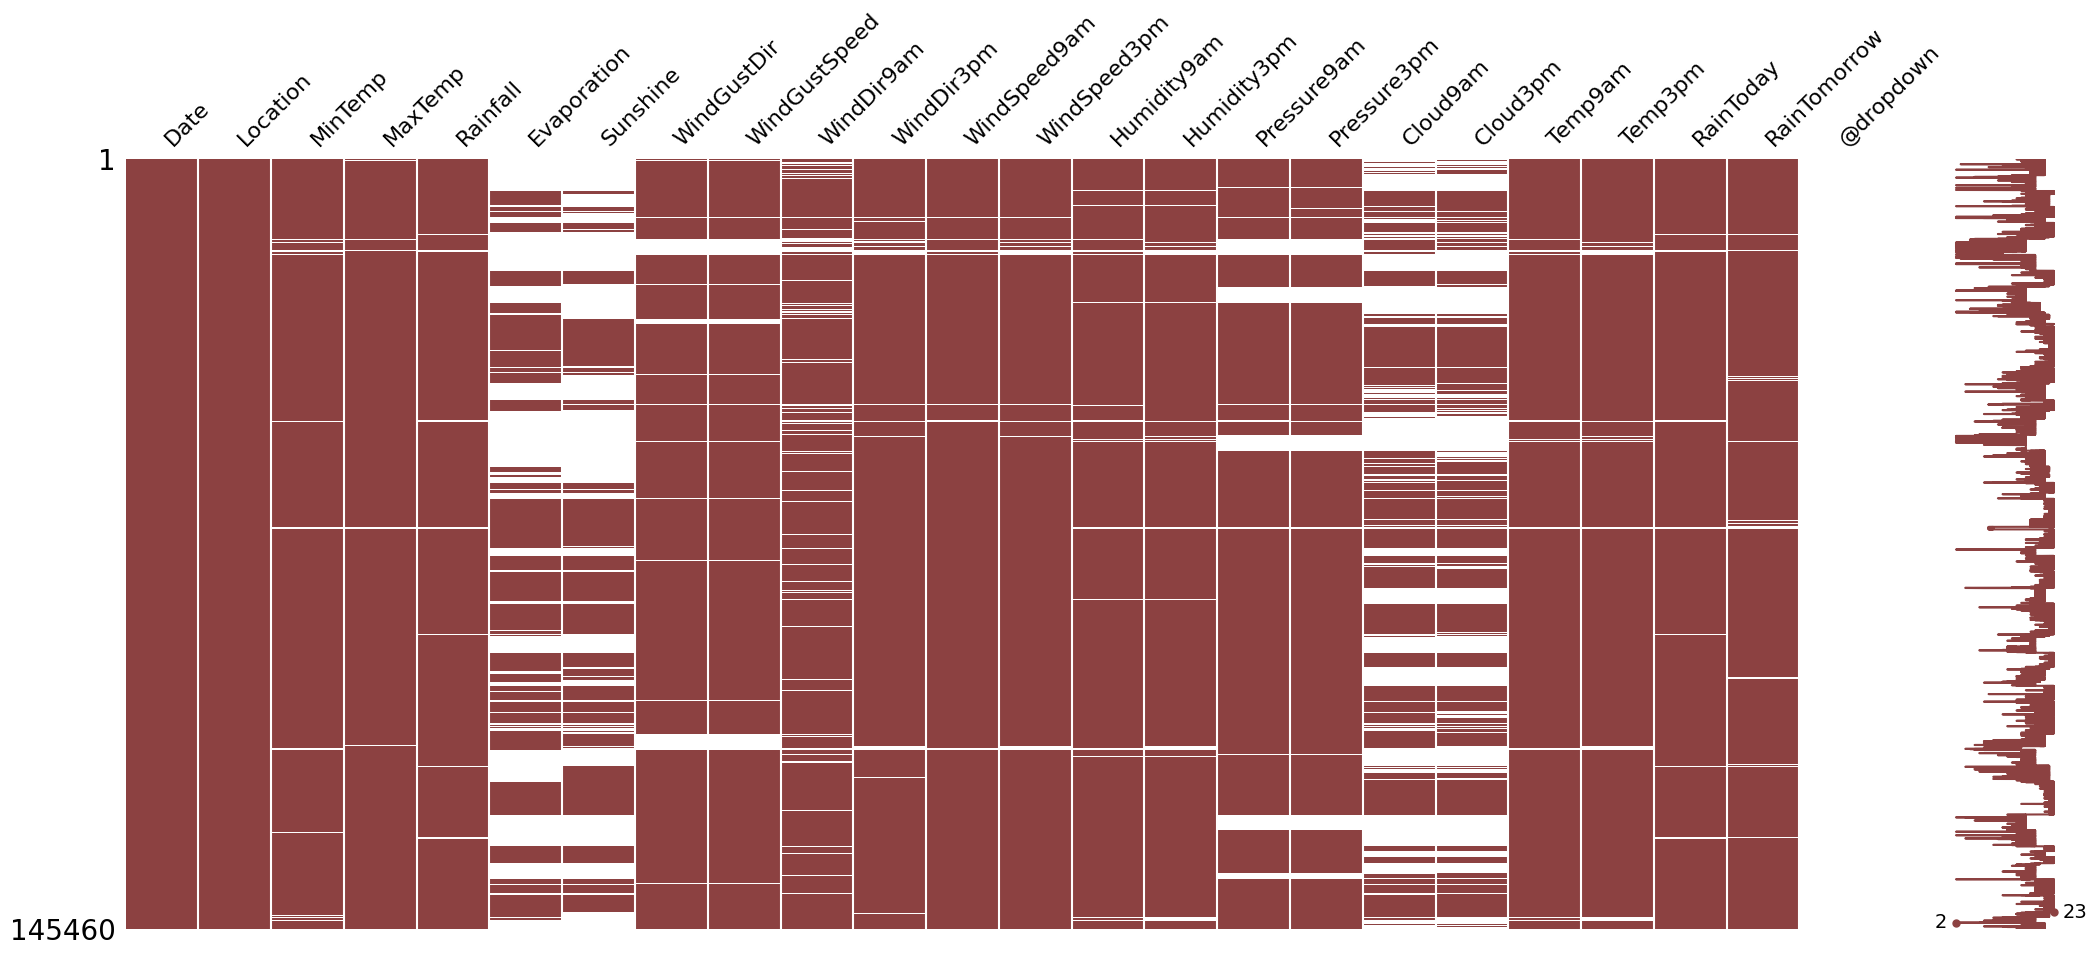

In [10]:
import missingno as msno
msno.matrix(data,color=(0.55,0.255,0.255),fontsize=16)

In [11]:
data_cat = data[['RainToday','WindGustDir','WindDir9am','WindDir3pm']]
data.drop(columns=['Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1,inplace=True)
data.drop(columns=['RainToday','WindGustDir','WindDir9am','WindDir3pm'],axis=1,inplace=True)

In [ ]:
# filling the missing data of numeric variables with mean
data['MinTemp'].fillna(data['MinTemp'].mean(),inplace=True)
data['MaxTemp'].fillna(data['MaxTemp'].mean(),inplace=True)
data['Rainfall'].fillna(data['Rainfall'].mean(),inplace=True)
data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean(),inplace=True)
data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean(),inplace=True)
data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean(),inplace=True) 
data['Humidity9am'].fillna(data['Humidity9am'].mean(),inplace=True) 
data['Humidity3pm'].fillna(data['Humidity3pm'].mean(),inplace=True) 
data['Pressure9am'].fillna(data['Pressure9am'].mean(),inplace=True) 
data['Pressure3pm'].fillna(data['Pressure3pm'].mean(),inplace=True) 
data['Temp9am'].fillna(data['Temp9am'].mean(),inplace=True) 
data['Temp3pm'].fillna(data['Temp3pm'].mean(),inplace=True) 



C:\Users\shukr\AppData\Local\Temp\ipykernel_49372\1567309838.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['MinTemp'].fillna(data['MinTemp'].mean(),inplace=True)
C:\Users\shukr\AppData\Local\Temp\ipykernel_49372\1567309838.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [ ]:
# Loading the names of categorical columns
cat_names = data_cat.columns

In [ ]:
# initialising the simple imputer for missing categorical columns 
import numpy as np
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [ ]:
# fitting and transferring the missing data
data_cat = imp_mode.fit_transform(data_cat)

In [ ]:
# converting data to dataframe  
data_cat = pd.DataFrame(data_cat,columns=cat_names)

In [17]:
data = pd.concat([data,data_cat],axis=1)

In [18]:
cor = data.select_dtypes(include='number').corr()

<Axes: >

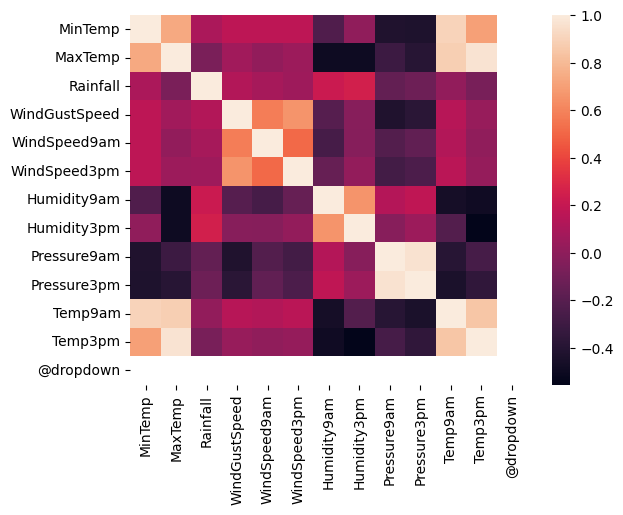

In [19]:
sns.heatmap(data=cor,xticklabels=cor.columns.values,yticklabels=cor.columns.values)

In [1]:
# Pair Plot
sns.pairplot(data)

NameError: name 'sns' is not defined

<Axes: >

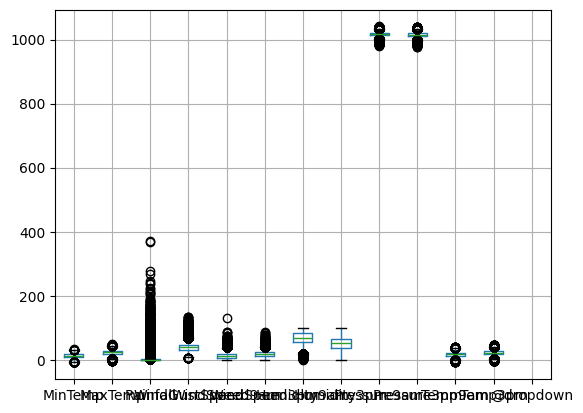

In [21]:
# Box Plot
data.boxplot()

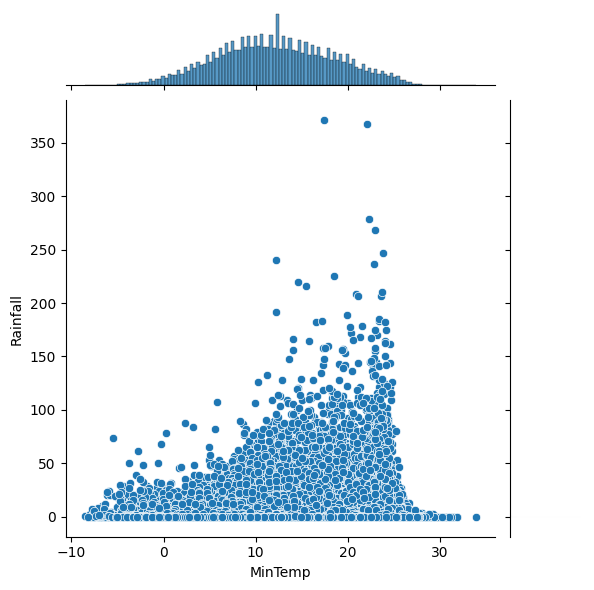

In [22]:
# Joint Plot
sns.jointplot(x="MinTemp", y="Rainfall", data=data)


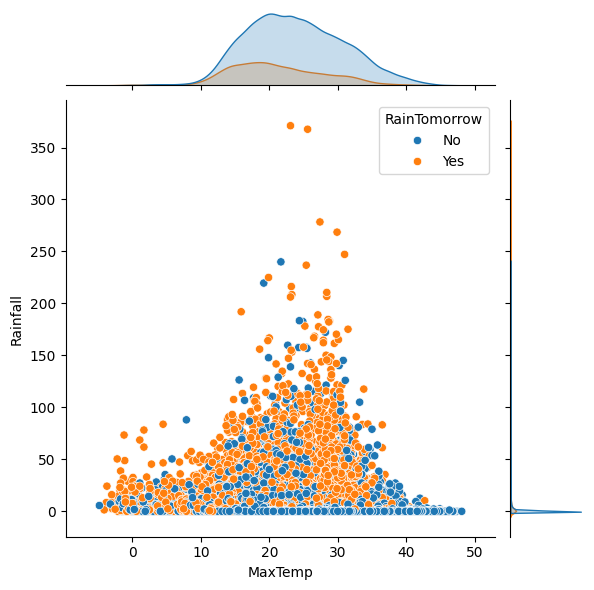

In [23]:
# Joint Plot
sns.jointplot(x="MaxTemp", y="Rainfall", data=data, hue="RainTomorrow")


<Axes: xlabel='RainTomorrow', ylabel='Count'>

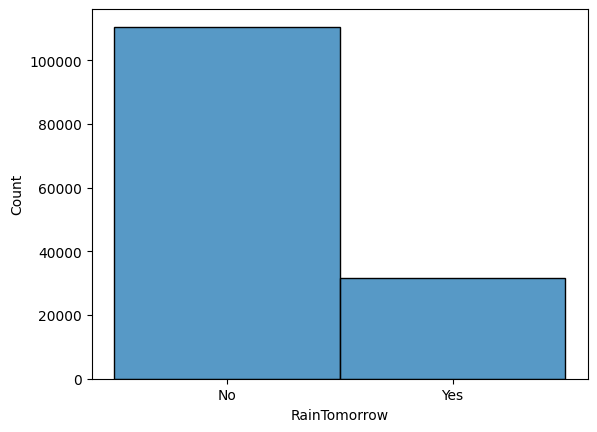

In [24]:
# Histogram 
sns.histplot(data['RainTomorrow'])

<Axes: xlabel='MaxTemp', ylabel='Rainfall'>

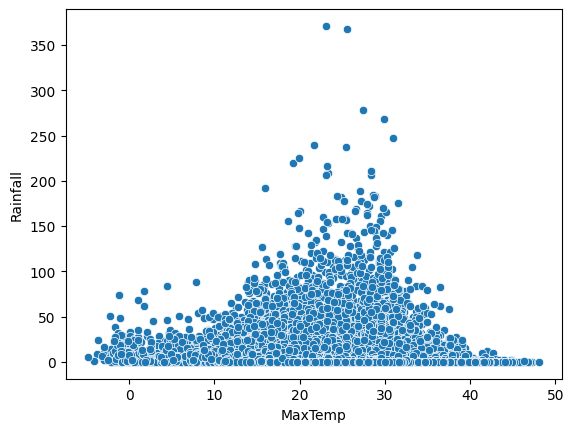

In [25]:
# Scatter Plot
sns.scatterplot(x='MaxTemp', y='Rainfall', data=data)


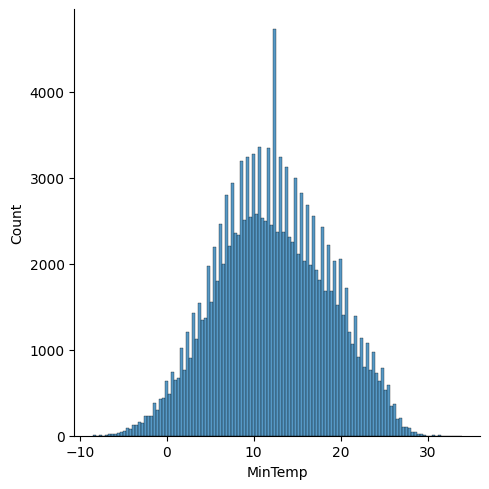

In [26]:
# Distplot / distribution plot
sns.displot(data['MinTemp'])

In [27]:
# Splitting x and y values
y = data['RainTomorrow']
x = data.drop('RainTomorrow',axis=1)

In [28]:
from sklearn.preprocessing import StandardScaler


In [29]:
# Splitting x and y values
y = data['RainTomorrow']
x = data.drop('RainTomorrow',axis=1)

In [30]:
names = x.columns #Loading the names of the x_features

In [31]:
names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', '@dropdown',
       'RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'],
      dtype='object')

In [32]:
# Initializing the StandardScler
sc =StandardScaler()

In [33]:
# Fitting on transforming the data into standard
x = data.select_dtypes(include='number')  # only numeric columns
x = sc.fit_transform(x)

c:\Users\shukr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\shukr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\shukr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [34]:
x = data.select_dtypes(include='number')
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

c:\Users\shukr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\shukr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\shukr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [35]:
# Splitting the data into train and test

x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size=0.2, random_state=0)

In [ ]:
# Model Initialization 
import sklearn
XGBoost = xgboost.XGBRFClassifier()
Rand_forest = sklearn.ensemble.RandomForestClassifier()
svm = sklearn.svm.SVC()
Dtree = sklearn.tree.DecisionTreeClassifier()
GBM = sklearn.ensemble.GradientBoostingClassifier()
log = sklearn.linear_model.LogisticRegression()

In [37]:
# Fitting the model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRFClassifier

# --- Encode target variable ---
le = LabelEncoder()
y = le.fit_transform(data['RainTomorrow'])

# --- One-hot encode features ---
x = pd.get_dummies(data.drop('RainTomorrow', axis=1))

# --- Handle missing values ---
imputer = SimpleImputer(strategy="mean")
x = imputer.fit_transform(x)

# --- Split data ---
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# --- Initialize models ---
XGBoost = XGBRFClassifier(n_estimators=50)
Rand_forest = RandomForestClassifier(n_estimators=50)
Dtree = DecisionTreeClassifier()
GBM = GradientBoostingClassifier(n_estimators=50)
log = LogisticRegression(max_iter=1000)

# --- Train models ---
XGBoost.fit(x_train, y_train)
Rand_forest.fit(x_train, y_train)
Dtree.fit(x_train, y_train)
GBM.fit(x_train, y_train)
log.fit(x_train,y_train)

c:\Users\shukr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['@dropdown']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\shukr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [39]:
# predicting the train values
p1 = XGBoost.predict(x_train)
p2 = Rand_forest.predict(x_train)
# p3 = svm.predict(x_train)
p4 = Dtree.predict(x_train)
p5 = GBM.predict(x_train)
p6 = log.predict(x_train)


In [40]:
# checking the accuracy score
print("xgboost:",metrics.accuracy_score(y_train,p1))
print("Rand_forest:",metrics.accuracy_score(y_train,p2))
# print("svm:",metrics.accuracy_score(y_train,p3))
print("Dtree:",metrics.accuracy_score(y_train,p4))
print("GBM:",metrics.accuracy_score(y_train,p5))
print("log:",metrics.accuracy_score(y_train,p6))

xgboost: 0.8344476144644576
Rand_forest: 0.9997078234566203
Dtree: 1.0
GBM: 0.836570191117833
log: 0.8214887254227966


In [45]:
# Accuracy_score
from sklearn import metrics  # if not already imported

t1 = XGBoost.predict(x_test)
t2 = Rand_forest.predict(x_test)
# t3 = svm.predict(x_test)
t4 = Dtree.predict(x_test)
t5 = GBM.predict(x_test)
t6 = log.predict(x_test)


print("xgboost:", metrics.accuracy_score(y_test, t1))
print("Rand_forest:", metrics.accuracy_score(y_test, t2))
# print("svm:", metrics.accuracy_score(y_test, t3))
print("Dtree:", metrics.accuracy_score(y_test, t4))
print("GBM:", metrics.accuracy_score(y_test, t5))
print("log:", metrics.accuracy_score(y_test, t6))


xgboost: 0.8252096796370136
Rand_forest: 0.8323594115220679
Dtree: 0.7958545304551079
GBM: 0.8327031486319263
log: 0.8202254915440671


In [60]:
y_pred = XGBoost.predict(x_test)

In [61]:
# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

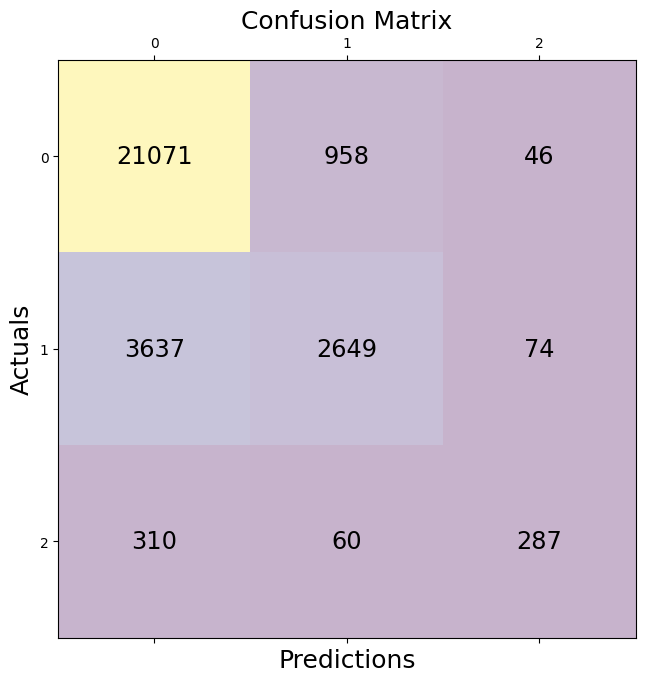

In [62]:
fig,ax = plt.subplots(figsize=(7.5,7.5))
ax.matshow(conf_matrix,alpha=0.3)
for i in range(conf_matrix.shape[0]):
  for j in range(conf_matrix.shape[1]):
    ax.text(x=j,y=i,s=conf_matrix[i,j],va='center',ha='center',size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals',fontsize=18)
plt.title('Confusion Matrix',fontsize=18)
plt.show()

In [68]:
# ROC-Auc Curve
print(conf_matrix)
print("Accuracy:",Accuracy)
print("Precesion:",Precesion)
print("Recall:",Recall)
print("F1-score",F1_score)

[[21071   958    46]
 [ 3637  2649    74]
 [  310    60   287]]
Accuracy: 0.8252096796370136


NameError: name 'Precesion' is not defined

In [86]:
import pickle

In [88]:
model = Rand_forest

pickle.dump(model,open('rainfall.pkl','wb'))  #model
pickle.dump(le,open('encoder.pkl','wb'))  #encoder saving
pickle.dump(imp_mode,open('impter.pkl','wb'))   #imputer saving
pickle.dump(sc,open('scale.pkl','wb'))    #scaling the data